In [1]:
import matplotlib.pyplot as plt

# Data Exploration

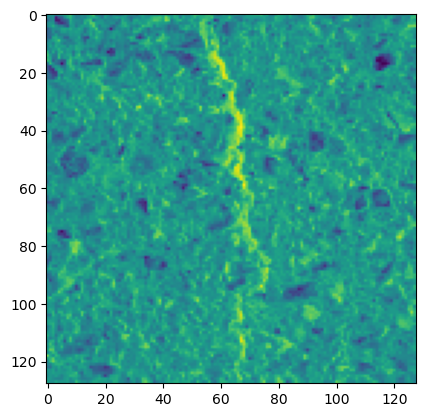

In [2]:
from glob import glob
import numpy as np
import cv2

filenames = glob('crack_segmentation_dataset/images/DeepCrack*.jpg')
X = np.random.choice(filenames)
img = cv2.imread(X, -1)
img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)
img = 255-cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img)
plt.show()

## Mask Generator

In [3]:
def generate_crack(n_branches, height=128, width=128):
    if np.random.randint(low=0, high=2) == 0:
        prev_point = [np.random.randint(low=0, high=height), 0]
        theta = np.random.randint(0, 180)
    else:
        prev_point = [0, np.random.randint(low=0, high=height)]
        theta = np.random.randint(-90, 90)
    
    crack_image = np.zeros((height, width))
    all_points = [prev_point]
    all_theta = [theta]

    for i in range(n_branches):
        t = np.random.randint(1, 3)
        for j in range(10):
            length = np.random.uniform(1, height//10)
            x2 = prev_point[0] + length * np.cos(theta * np.pi / 180)
            y2 = prev_point[1] + length * np.sin(theta * np.pi / 180) 
            point = np.round([x2, y2]).astype(int)
            crack_image = cv2.line(crack_image, prev_point, point, color=1, thickness=t)
            prev_point = point
            theta = np.random.uniform(low=theta-45, high=theta+45)
            all_points += [prev_point]
            all_theta += [theta]

        
        ind = np.random.randint(low=0, high=len(all_points))
        prev_point = all_points[ind]
        theta = all_theta[ind]

    return crack_image

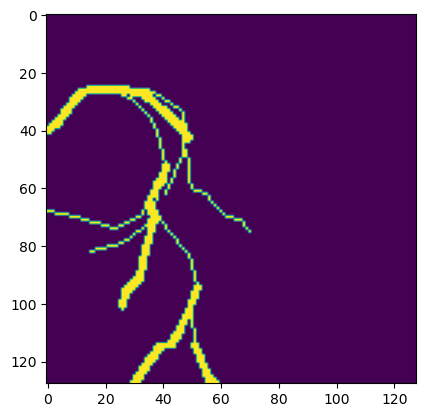

In [4]:
crack = np.zeros((128, 128))

for i in range(np.random.randint(1, 3)):
    crack += generate_crack(10, height=128, width=128)
crack = crack

crack = cv2.resize(crack, (128, 128), interpolation=cv2.INTER_AREA).astype(bool).astype(int)

plt.figure()
plt.imshow(crack)
plt.show()

In [41]:
import cyclegan
cyclegan = importlib.reload(cyclegan)

filenames = glob('crack_segmentation_dataset/images/DeepCrack*.jpg')
y_filenames = glob('crack_segmentation_dataset/masks/CFD*.jpg')

cyclegan_model = cyclegan.DataGenerator(filenames, y_filenames, 128, 128)

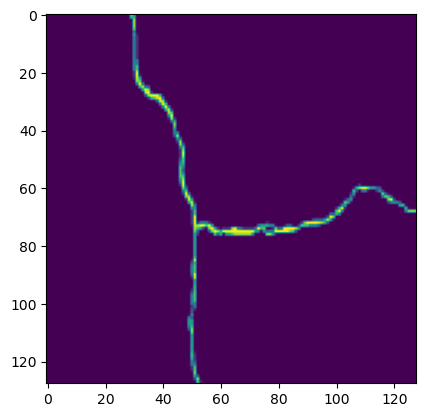

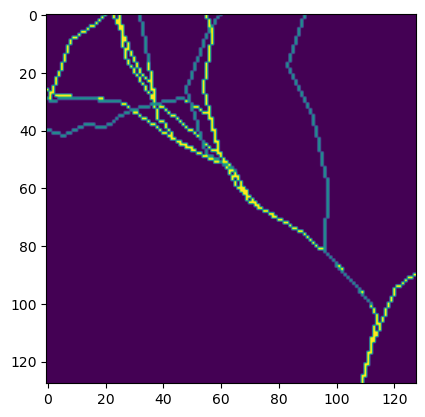

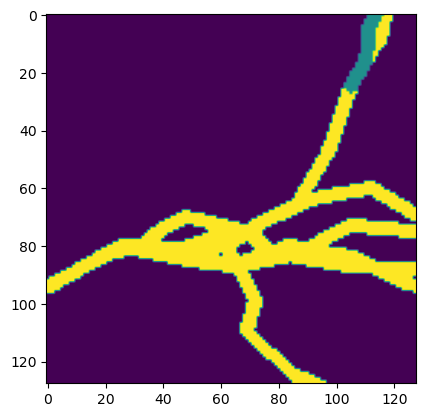

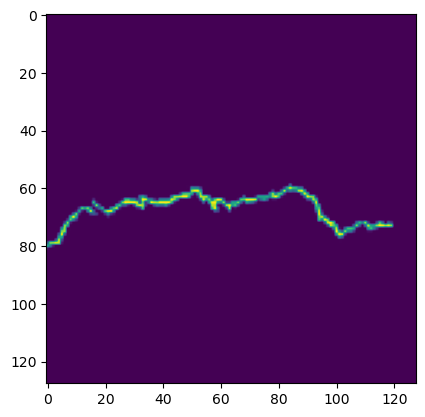

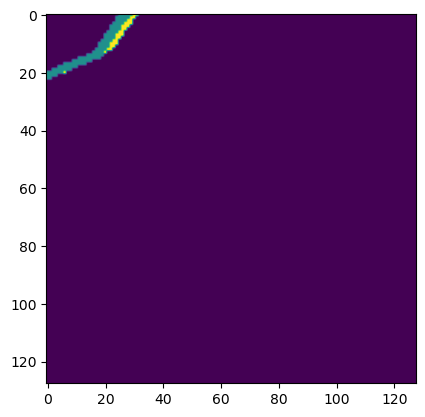

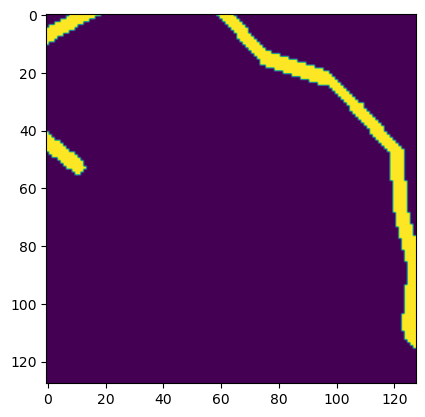

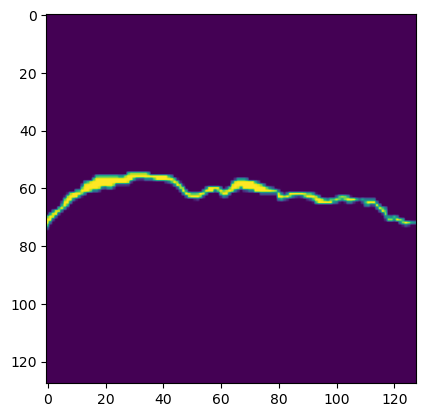

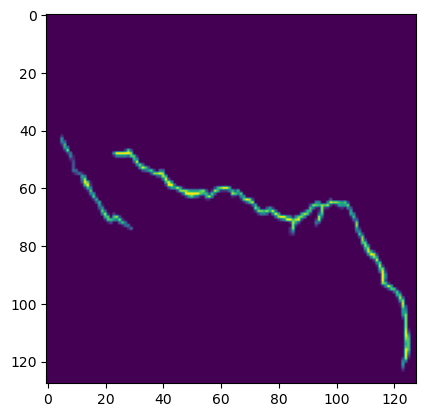

In [42]:
cracks, _ = cyclegan_model.generate_mask_samples(8, 8)
#print(np.shape(cracks))

for img in cracks:
    plt.figure()
    plt.imshow(np.squeeze(img))
    plt.show()


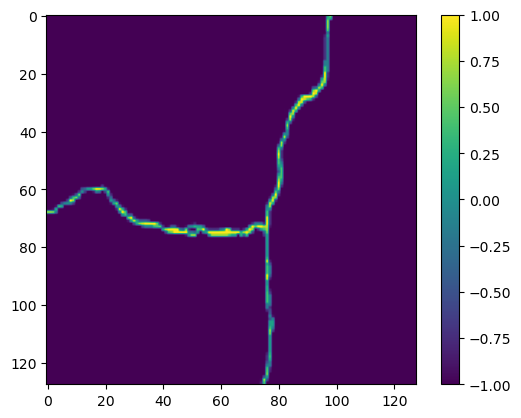

In [36]:
plt.figure()
plt.imshow(np.squeeze(cracks[1]))
plt.colorbar()
plt.show()

# Building the Classes

In [3]:
import importlib
import cyclegan
cyclegan = importlib.reload(cyclegan)

crack = cyclegan.DataGenerator(, 128, 128).generate_crack()

plt.figure()
plt.imshow(crack)
plt.show()

TypeError: __init__() missing 1 required positional argument: 'width'

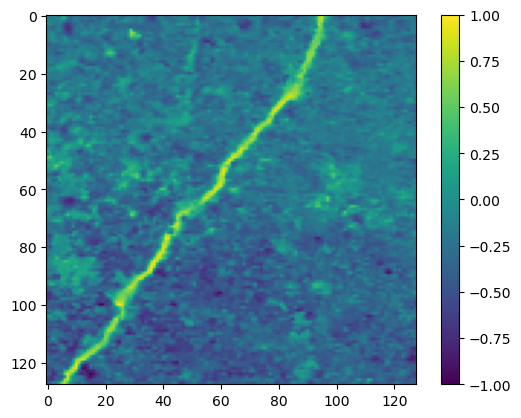

In [6]:
X, Y = cyclegan.DataGenerator(filenames, 128, 128).generate_real_samples(8, 8)
plt.figure()
plt.imshow(np.squeeze(X[0]))
plt.colorbar()
plt.show()

In [7]:
cyclegan_model = cyclegan.CycleGAN(128, 128)

In [8]:
cyclegan_model.data_generator = cyclegan.DataGenerator(filenames, 128, 128)

In [9]:
cyclegan_model.g_model_AB.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 12  6400        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 instance_normalization (Instan  (None, 128, 128, 12  256        ['conv2d[0][0]']                 
 ceNormalization)               8)                                                            

In [11]:
cyclegan_model.train(100, 1)

>1 / 10000, dA[3.159,7.999] dB[2.161,2.154] g[22.029,38.991]
>2 / 10000, dA[4.825,26.432] dB[15.441,3.397] g[28.350,56.981]
>3 / 10000, dA[10.680,12.547] dB[6.532,12.488] g[26.704,37.952]
>4 / 10000, dA[9.133,8.769] dB[6.642,18.349] g[42.707,26.091]
>5 / 10000, dA[3.779,3.706] dB[6.191,6.353] g[34.337,22.120]
>6 / 10000, dA[7.839,5.038] dB[4.013,12.777] g[37.012,26.362]
>7 / 10000, dA[9.242,5.564] dB[11.290,14.725] g[55.044,28.719]
>8 / 10000, dA[9.468,5.047] dB[8.481,5.099] g[30.491,27.322]
>9 / 10000, dA[6.250,13.017] dB[7.609,11.888] g[36.167,38.377]
>10 / 10000, dA[3.618,8.023] dB[12.277,8.990] g[35.551,32.779]
>11 / 10000, dA[6.473,10.851] dB[3.739,21.102] g[39.776,40.302]
>12 / 10000, dA[3.818,6.837] dB[4.536,8.546] g[31.761,26.754]
>13 / 10000, dA[3.669,5.193] dB[6.579,13.427] g[58.766,25.774]
>14 / 10000, dA[7.880,6.445] dB[6.274,4.380] g[24.039,30.853]
>15 / 10000, dA[7.228,10.728] dB[18.772,12.179] g[39.397,38.884]
>16 / 10000, dA[5.926,10.887] dB[4.784,3.802] g[27.293,31.359

KeyboardInterrupt: 

In [12]:
pred = cyclegan_model.g_model_AB.predict(X)

1/1 [==============================] - 0s 26ms/step


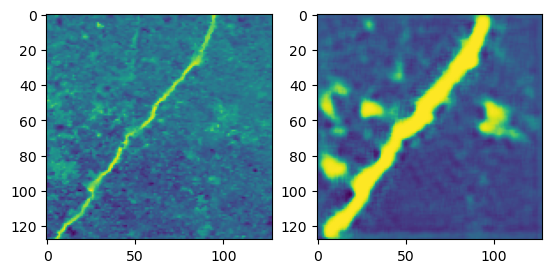

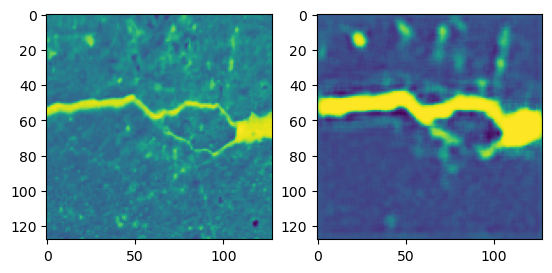

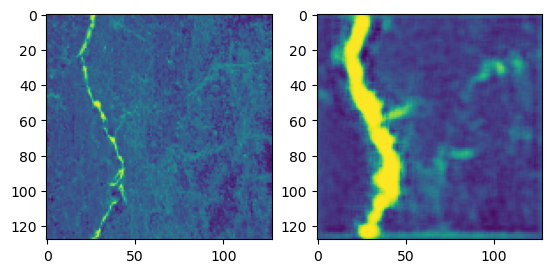

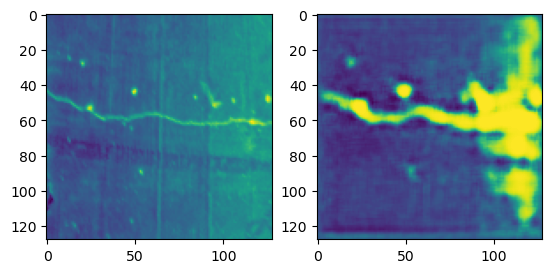

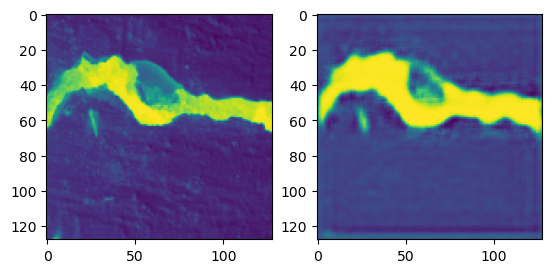

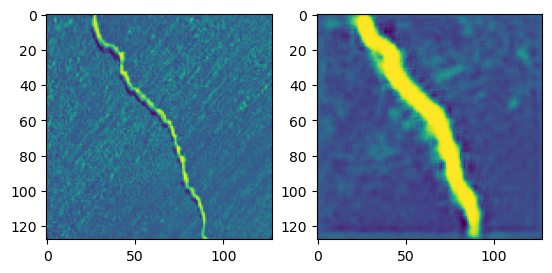

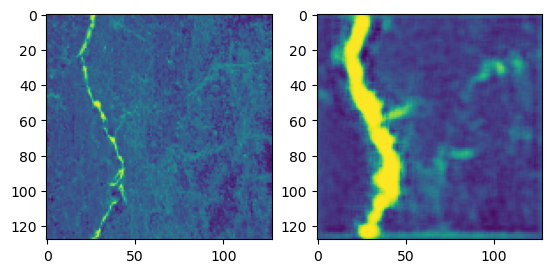

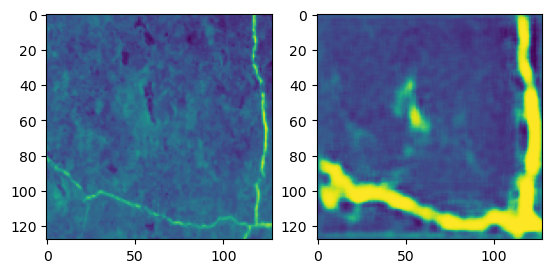

In [13]:
for i in range(len(X)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.squeeze(X[i]))
    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(pred[i]))
    plt.show()

In [14]:
pred_BA = cyclegan_model.g_model_BA.predict(pred)

1/1 [==============================] - 0s 23ms/step


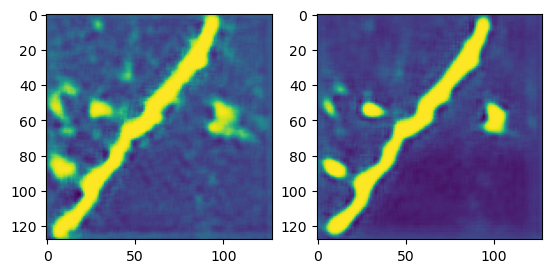

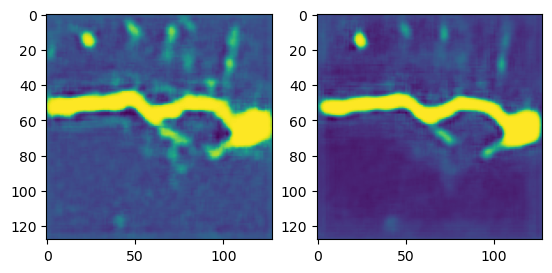

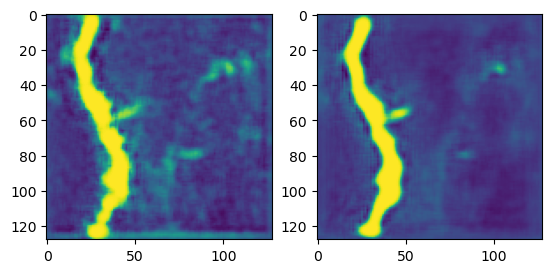

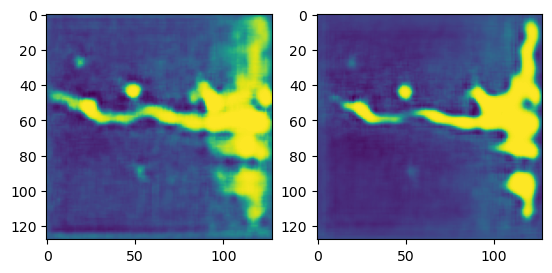

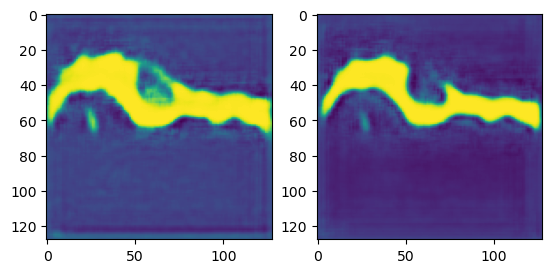

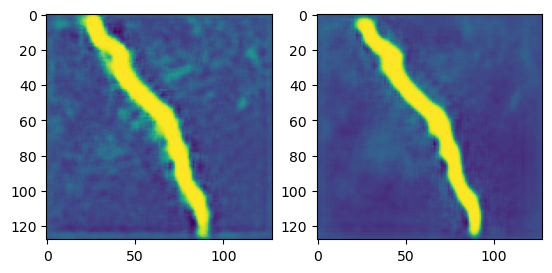

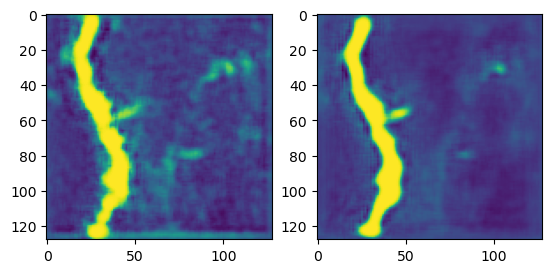

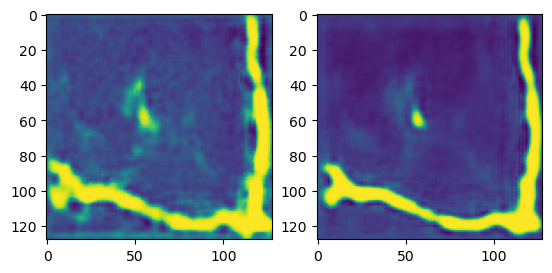

In [15]:
for i in range(len(pred)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.squeeze(pred[i]))
    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(pred_BA[i]))
    plt.show()

In [16]:
all_images = []
for f in filenames:
    all_images += [cv2.imread(f, -1)]

239


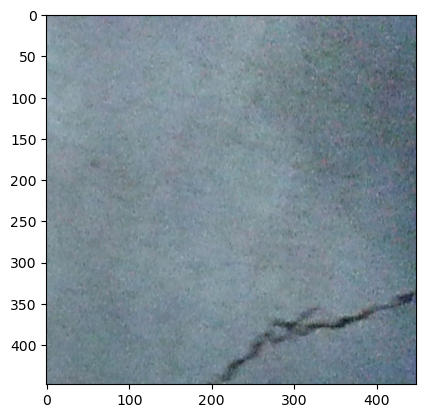

In [17]:
ind = np.random.randint(0, len(all_images))
print(ind)
plt.figure()
plt.imshow(all_images[ind])
plt.show()

In [18]:
all_images[ind]

array([[[141, 148, 157],
        [141, 148, 157],
        [142, 148, 159],
        ...,
        [ 96, 116, 133],
        [ 94, 117, 132],
        [ 83, 109, 123]],

       [[139, 146, 155],
        [137, 144, 153],
        [136, 142, 153],
        ...,
        [ 95, 115, 132],
        [ 88, 113, 129],
        [ 79, 106, 120]],

       [[131, 140, 150],
        [129, 138, 148],
        [129, 138, 148],
        ...,
        [ 97, 120, 136],
        [ 89, 115, 131],
        [ 84, 113, 128]],

       ...,

       [[115, 131, 143],
        [115, 131, 143],
        [115, 131, 143],
        ...,
        [ 84, 103, 130],
        [ 83, 100, 127],
        [ 93, 107, 135]],

       [[116, 132, 144],
        [114, 130, 142],
        [114, 130, 142],
        ...,
        [ 90, 109, 136],
        [ 89, 105, 134],
        [ 92, 108, 137]],

       [[118, 134, 146],
        [116, 132, 144],
        [115, 131, 143],
        ...,
        [ 96, 115, 142],
        [ 94, 109, 141],
        [ 91, 106, 138]]

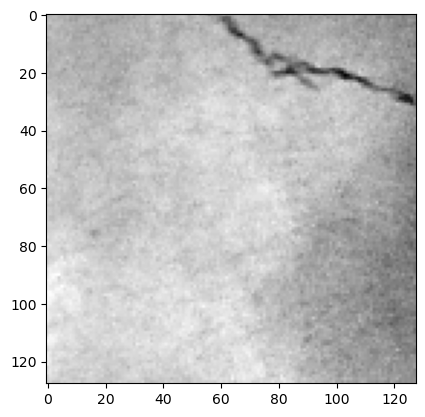

(1, 128, 128, 1)


In [20]:
from imgaug import augmenters as iaa

img = all_images[ind]
img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = 255 - img
img = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
img = img*2-1
img = np.expand_dims(img, axis=[0, -1])

seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
])

img = seq(images=img)

plt.figure()
plt.imshow(np.squeeze(img*-1), cmap='gist_gray')
plt.show()


print(np.shape(img))

In [22]:
img_pred = cyclegan_model.g_model_AB.predict(img)

1/1 [==============================] - 0s 25ms/step


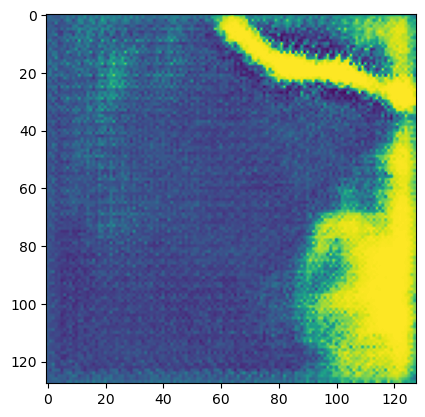

In [23]:
plt.figure()
plt.imshow(np.squeeze(img_pred))
plt.show()

1/1 [==============================] - 0s 22ms/step


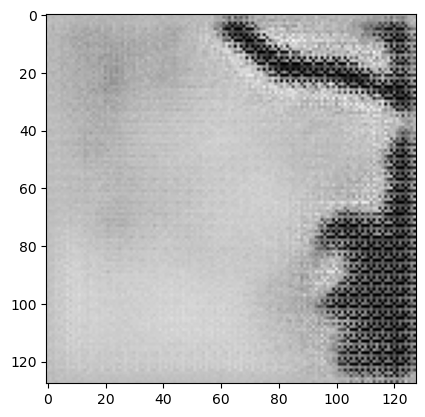

In [24]:
img_pred_back = cyclegan_model.g_model_BA.predict(img_pred)

plt.figure()
plt.imshow(np.squeeze(img_pred_back)*-1, cmap='gist_gray')
plt.show()